<a href="https://colab.research.google.com/github/kanthavelan/Yulu/blob/main/Yulu_Case_Study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

In [ ]:
yulu = pd.read_csv('bike_sharing.csv')
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#chekcing rows and columns
yulu.shape

(10886, 12)

In [ ]:
yulu.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
yulu.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#No missing values in dataset

In [ ]:
yulu.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

# There is no duplicate data

In [ ]:
yulu.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
df = yulu.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [ ]:
#count = casual + registered
(df['casual'] + df['registered'] == df['count']).value_counts()


True    10886
Name: count, dtype: int64

In [ ]:
#convert category columns

df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [ ]:
#converting datetime column into date time format
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
#creating new columns for datetime

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [ ]:
print(df['datetime'].min())
print(df['datetime'].max())

2011-01-01 00:00:00
2012-12-19 23:00:00


In [ ]:
# replacing the number with category

# change of season
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# change of holiday
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})

# change of month
df['month'] = df['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,Spring,No,No,1,9.84,14.395,81,0.0,3,13,16,2011,January,1,0
1,2011-01-01 01:00:00,Spring,No,No,1,9.02,13.635,80,0.0,8,32,40,2011,January,1,1
2,2011-01-01 02:00:00,Spring,No,No,1,9.02,13.635,80,0.0,5,27,32,2011,January,1,2
3,2011-01-01 03:00:00,Spring,No,No,1,9.84,14.395,75,0.0,3,10,13,2011,January,1,3
4,2011-01-01 04:00:00,Spring,No,No,1,9.84,14.395,75,0.0,0,1,1,2011,January,1,4


In [ ]:
df.describe(include='category').T

,count,unique,top,freq
season,10886,4,Winter,2734
holiday,10886,2,No,10575
workingday,10886,2,Yes,7412
weather,10886,4,1,7192


#Outlier Detection

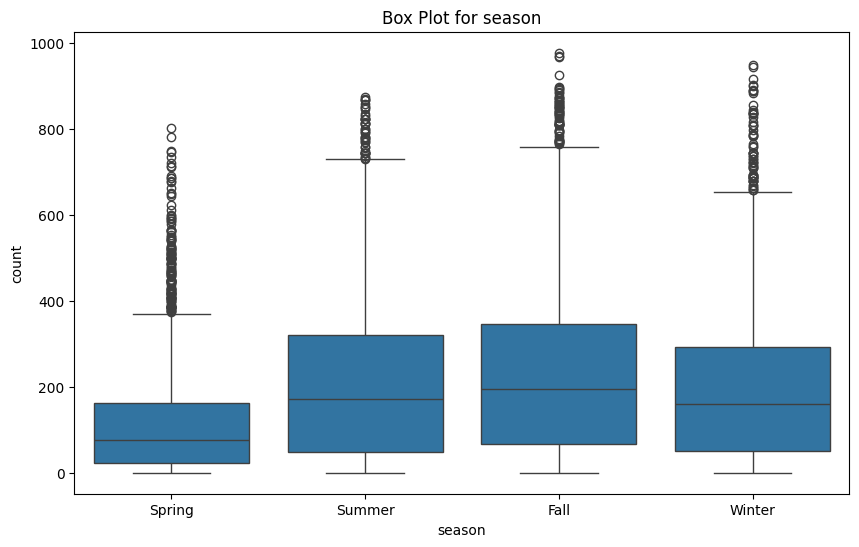

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x='season',y='count',data=df)
plt.title('Box Plot for season')
plt.show()

#Insight:

In spring and winter there are more outliers detected.

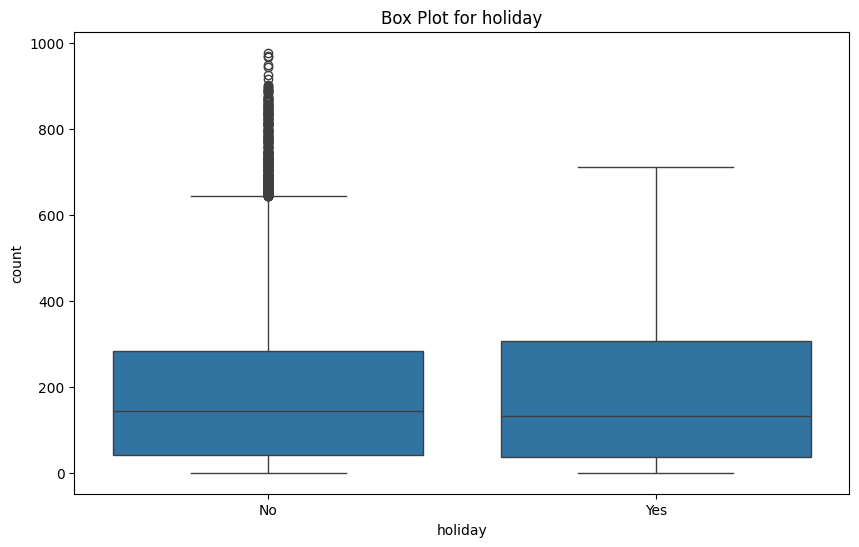

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x='holiday',y='count',data=df)
plt.title('Box Plot for holiday')
plt.show()

#Insight:

In 'No'(Not a holiday) category there are more outliers detected.

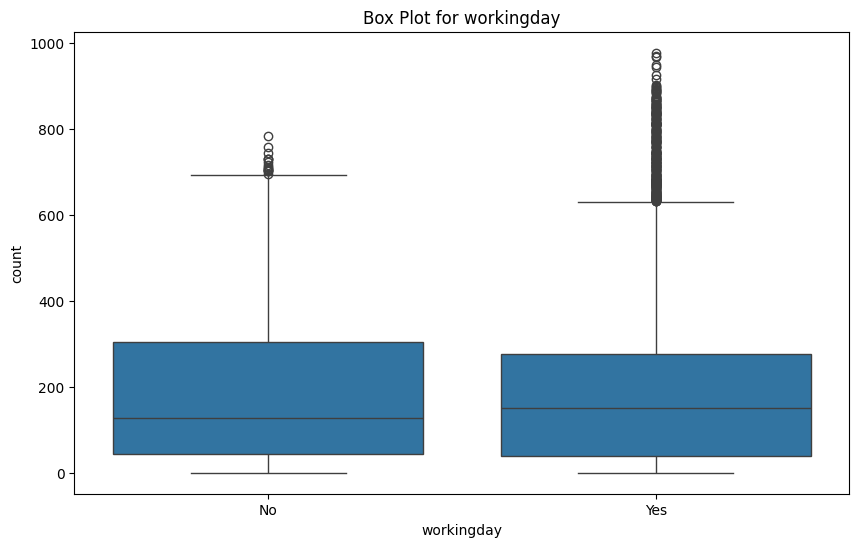

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x='workingday',y='count',data=df)
plt.title('Box Plot for workingday')
plt.show()

#Insight:

In 'Yes'(working day) column,there are more outliers detetcted and the same thing is occured in holiday ('No' column - without holiday) chart also. we might look into deeper.

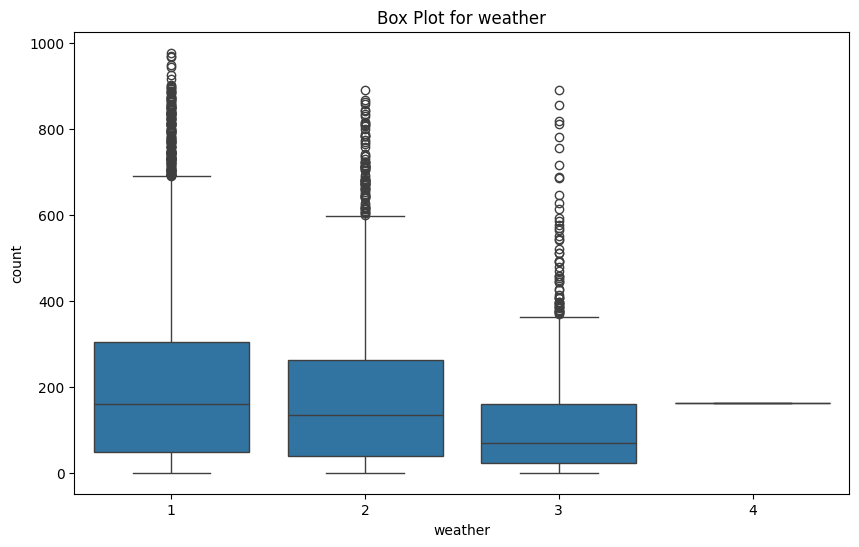

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x='weather',y='count',data=df)
plt.title('Box Plot for weather')
plt.show()

#Insight:

category 3 had lot of outliers and category 4 does not have any outliers.

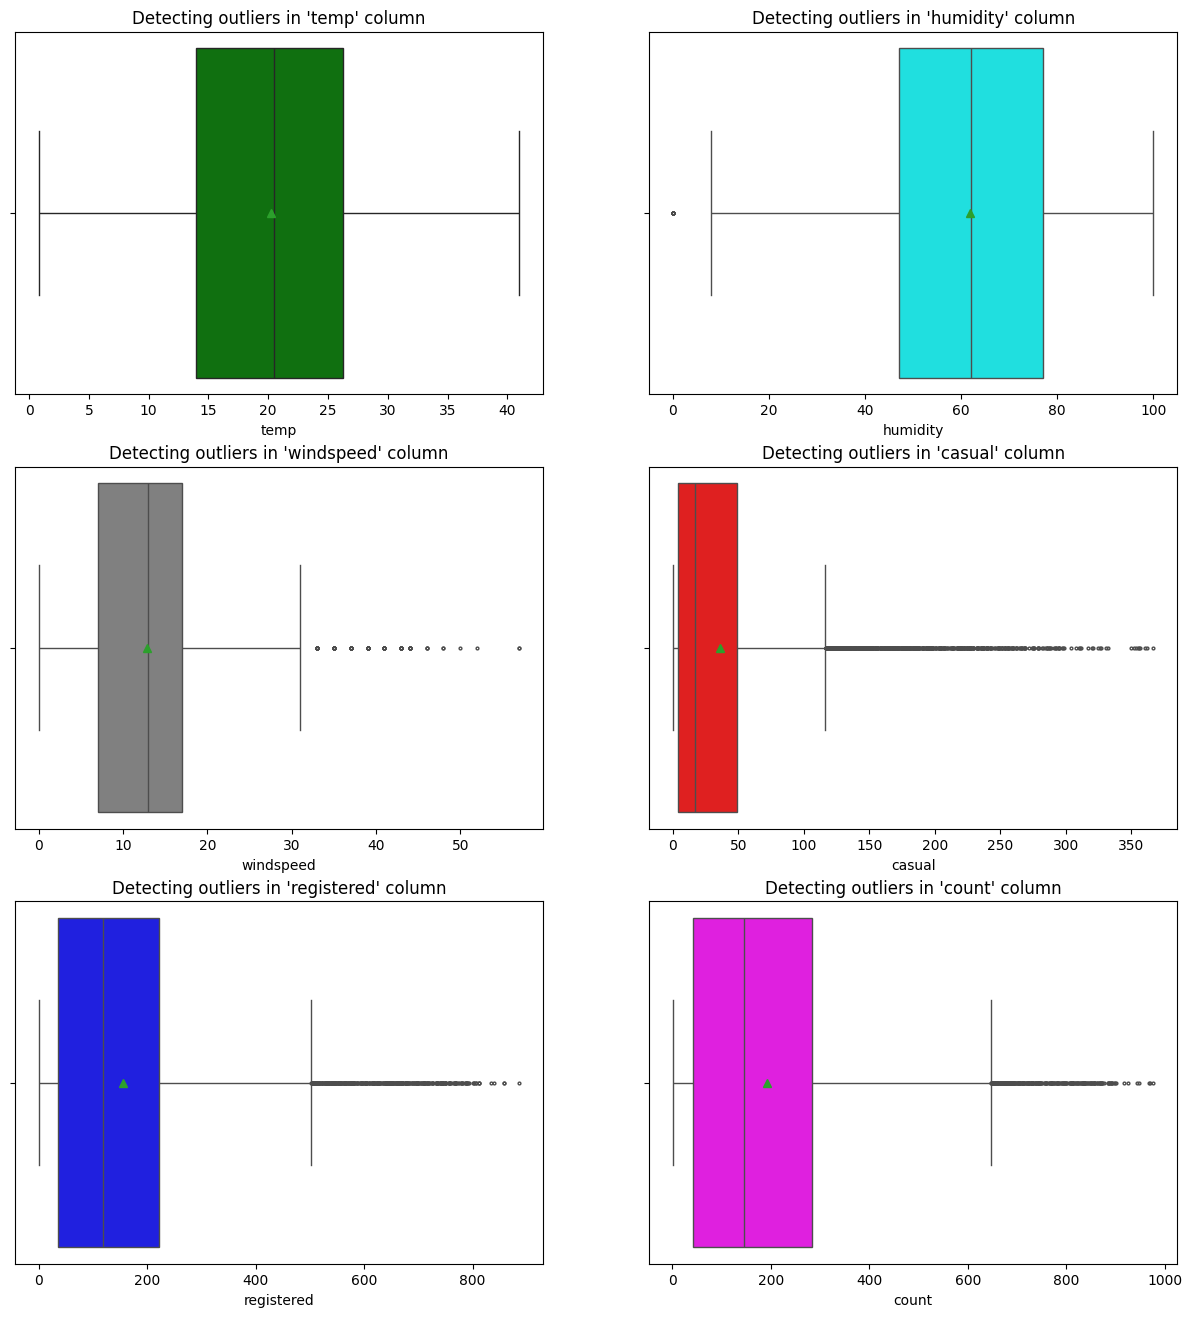

In [ ]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

#Insight:

There is no outlier in the 'temp' column.

There are few outliers in the 'humidity' column.

There are more outliers in the 'windspeed', 'casual', 'registered', 'count' column.

#Bivariate Analysis

[]

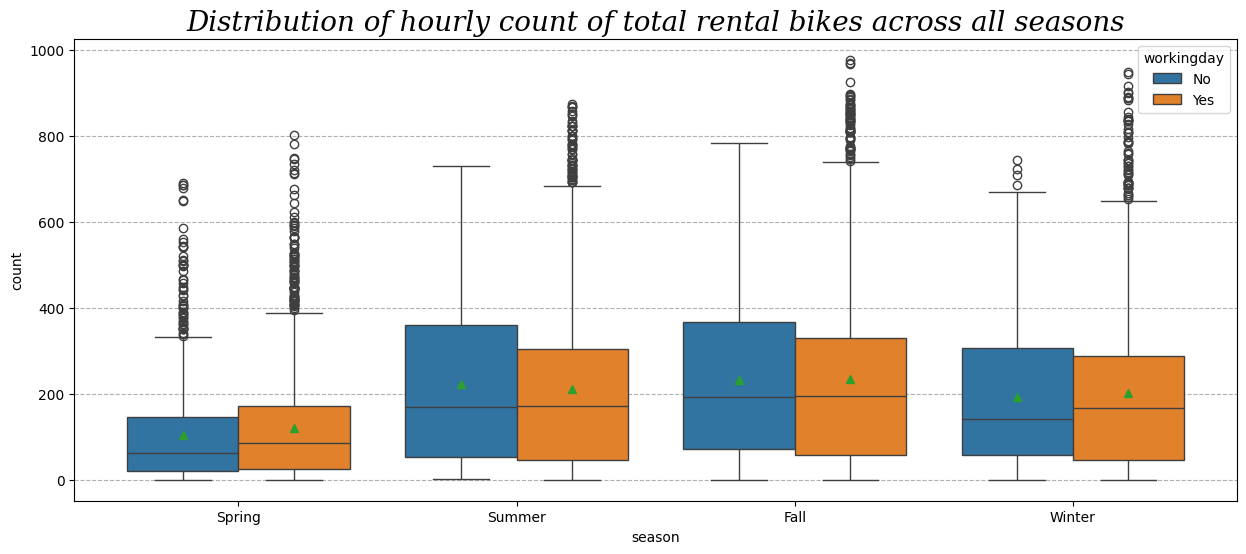

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

#Insight:

Observed from the graph, the hourly count of rental bikes is higher in summer, fall, winter season. It is lower in spring season.

[]

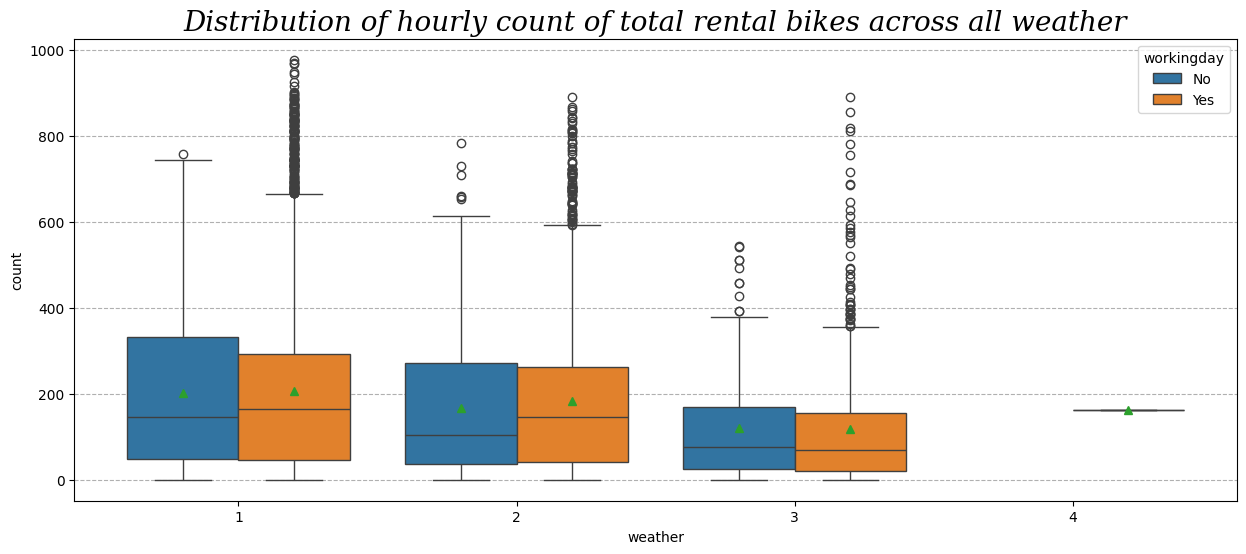

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weather',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

#Insight:

It seems like hourly count of rental bikes is higher in clear (Few clouds) and Mist (cloudy weather). Bikes rental count is lower in Thunderstorm rainy season and no cycle rentals in heavy rainy weather.

In [ ]:
# counts based on months

monthly_count = df.groupby('month')['count'].sum().reset_index()

monthly_count = monthly_count.sort_values(by='count', ascending=False)

monthly_count

,month,count
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434
8,May,200147
9,November,176440
0,April,167402
2,December,160160
7,March,133501


<ipython-input-170-9651617a6838>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='count', data=monthly_count, palette='flare', width = 0.4)


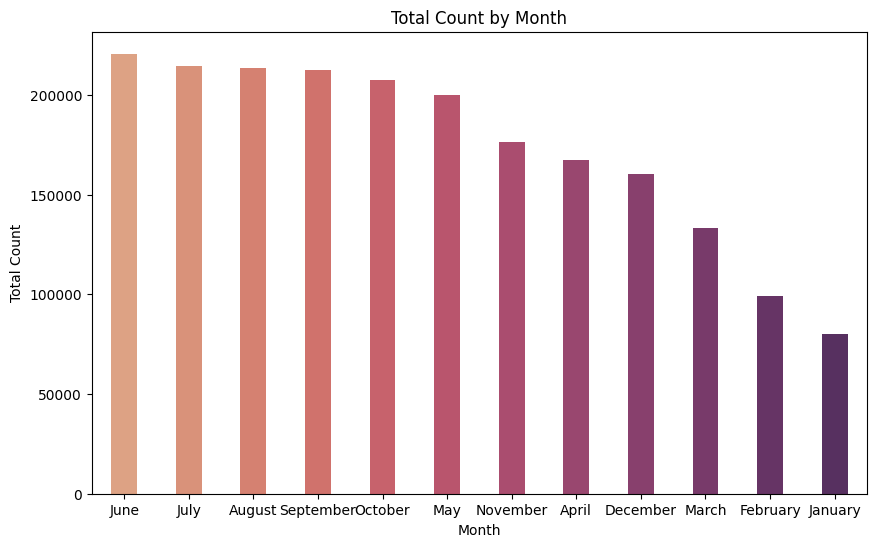

In [ ]:
# rentals on monthly counts

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=monthly_count, palette='flare', width = 0.4)

plt.title('Total Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.show()

#Insight:

# Peak month for bike rentals is June month with count 220733 followed by July, August, September.

# Moderate period for bike rentals is October, may, November, April, December.

# January, February, March month for bike rentals is very lower. It may be weather condition or some other activities.

#Hypothesis testing - 1:

# Working Day has effect on number of electric cycles rented

# Setup Null hypothesis:

#Null Hypothesis ( H0 ) - Working Day does not have any effect on the number of electric cycles rented.

#Alternate Hypothesis ( HA ) - Working Day has some effect on the number of electric cycles rented

#Normality test using histplot

Text(0.5, 1.0, 'Workingdays count')

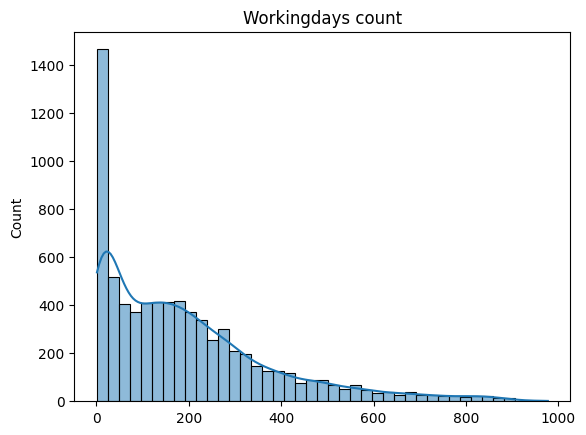

In [ ]:
#Normality Test

sns.histplot(df[df['workingday']=='Yes']['count'].values,kde=True)
plt.title('Workingdays count')


Text(0.5, 1.0, 'Non Workingdays count')

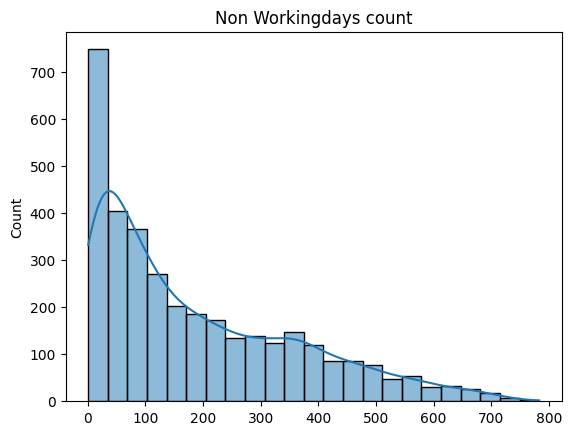

In [ ]:
sns.histplot(df[df['workingday']=='No']['count'].values,kde=True)
plt.title('Non Workingdays count')

#Insight:

The above graph shows that the distribution does not follow normal distribution.

#Distribution check using qqplot

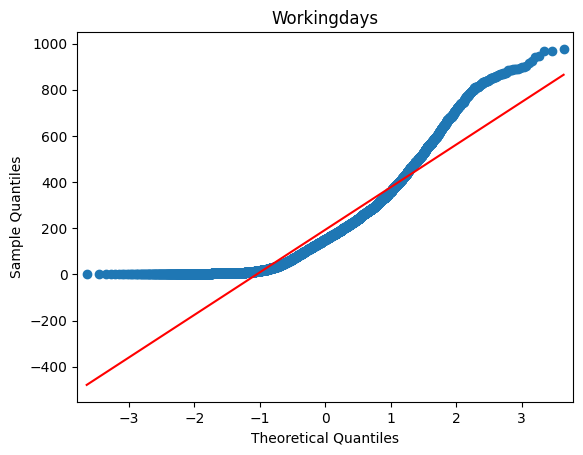

In [ ]:
qqplot(df[df['workingday']=='Yes']['count'].values, line="s")
plt.title("Workingdays")
plt.show()

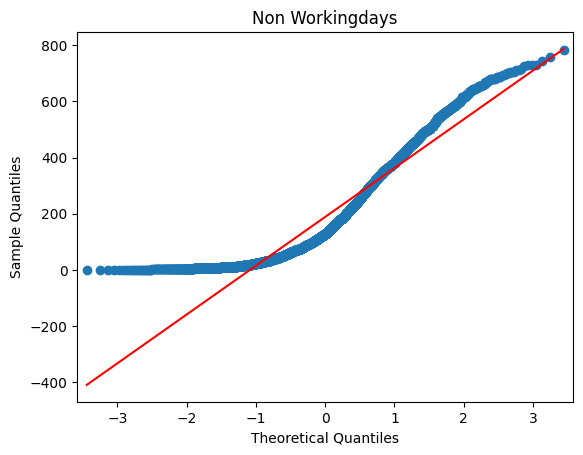

In [ ]:
qqplot(df[df['workingday']=='No']['count'].values, line="s")
plt.title("Non Workingdays")
plt.show()

#Insight:

The above qqplot sample does not follow normal distribution.

#using shapiro test for Normality:


#HO: The sample follows normal distribution
#HA: The sample does not follow normal distribution

#alpha = 0.05

In [ ]:
test_stat, p_value = shapiro(df.loc[df['workingday'] == 'Yes', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.4699780638792264e-38
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df.loc[df['workingday'] == 'No', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0293118277281804e-35
The sample does not follow normal distribution


#using Lavene's test for Variance

# H0: Variances are equal
# Ha: Variances are not equal

In [ ]:
df[df['workingday']=='No']['count'].values.var()

30171.346098942427

In [ ]:
df[df['workingday']=='Yes']['count'].values.var()

34040.69710674686

In [ ]:
levene_stat, p_value = levene(df[df['workingday']=='Yes']['count'].values, df[df['workingday']=='No']['count'].values)
print(levene_stat)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
    print("Variances are equal")

0.004972848886504472
0.9437823280916695
Variances are equal


#Insight:

#Hence p value is greater than significance level, Accept HO.

#Variance are approximately equal.

#The data is not normally distributed using qqplot and Wilkin-ShapiroTest.

#It is important to highlight that variance between the two groups are equal.

#using Two Sample Independent T-Test.

In [ ]:
ttest_stat, p_val = ttest_ind(df[df['workingday']=='Yes']['count'].values, df[df['workingday']=='No']['count'].values)

p_val

0.22644804226361348

In [ ]:
if p_value < 0.05:
    print("Reject H0 : Working Day has some effect on the number of electric cycles rented")
else:
    print("Fail to reject H0 : Working Day does not have any effect on the number of electric cycles rented.")

Fail to reject H0 : Working Day does not have any effect on the number of electric cycles rented.


In [ ]:
kruskal_stat, p_val = kruskal(df[df['workingday']=='Yes']['count'].values, df[df['workingday']=='No']['count'].values)

p_val

0.9679113872727798

In [ ]:
if p_value < 0.05:
    print("Reject H0 : Working Day has some effect on the number of electric cycles rented")
else:
    print("Fail to reject H0 : Working Day does not have any effect on the number of electric cycles rented.")

Fail to reject H0 : Working Day does not have any effect on the number of electric cycles rented.


#Insight:

#From hypothesis testing,

#Working Day does not have any effect on the number of electric cycles rented.

#Hypothesis Testing - 2

#No. of cycles rented similar or different in different seasons

# Setup Null hypothesis:

#Null Hypothesis ( H0 ) - No. of cycles rented similar in different seasons


#Alternate Hypothesis ( HA ) - No. of cycles rented different in different seasons.


In [ ]:
df_season_spring = df.loc[df['season'] == 'Spring', 'count']
df_season_summer = df.loc[df['season'] == 'Summer', 'count']
df_season_fall = df.loc[df['season'] == 'Fall', 'count']
df_season_winter = df.loc[df['season'] == 'Winter', 'count']

#Distribution check using QQplot

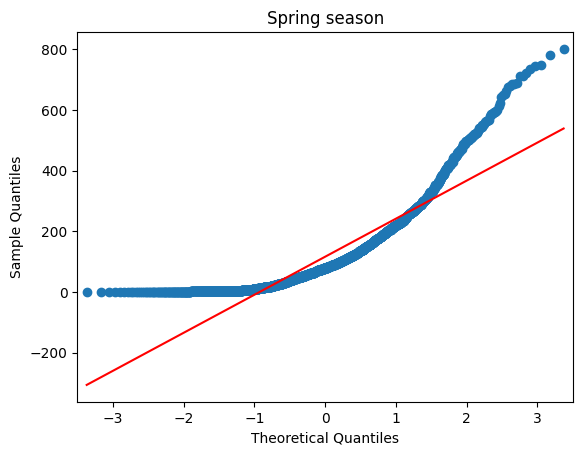

In [ ]:
qqplot(df_season_spring, line="s")
plt.title("Spring season")
plt.show()

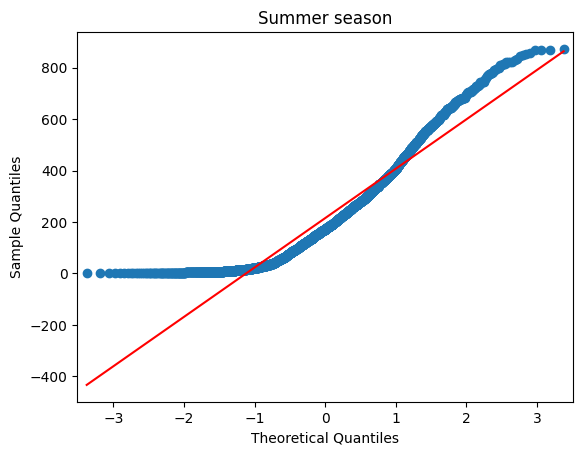

In [ ]:
qqplot(df_season_summer, line="s")
plt.title("Summer season")
plt.show()

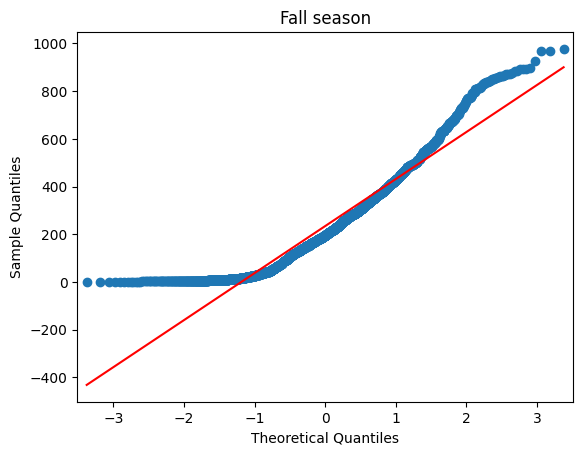

In [ ]:
qqplot(df_season_fall, line="s")
plt.title("Fall season")
plt.show()

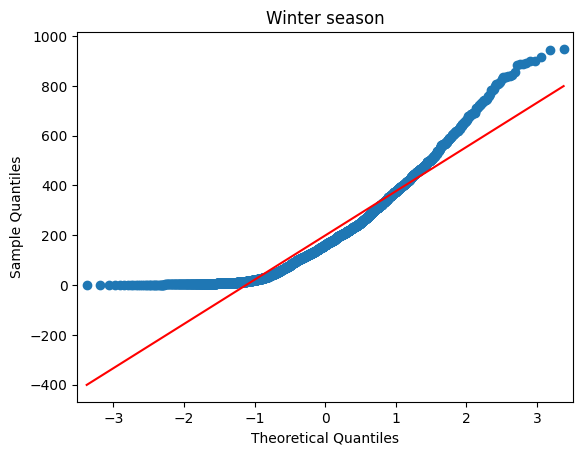

In [ ]:
qqplot(df_season_winter, line="s")
plt.title("Winter season")
plt.show()

#Insight:

The above qqplot sample does not follow normal distribution.

#using shapiro test for Normality:


#HO: The sample follows normal distribution
#HA: The sample does not follow normal distribution

#alpha = 0.05

In [ ]:
test_stat, p_value = shapiro(df_season_spring.sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0930128021733573e-43
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_season_summer.sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6436121319575942e-34
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_season_fall.sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.8062151017739986e-32
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_season_winter.sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.774554583426432e-35
The sample does not follow normal distribution


#using Lavene's test for Variance

# H0: Variances are equal
# Ha: Variances are not equal

In [ ]:
df_season_spring.var(),df_season_summer.var(),df_season_fall.var(),df_season_winter.var()

(15693.568533717144, 36867.01182553242, 38868.517012662865, 31549.720316669307)

In [ ]:
levene_stat, p_value = levene(df_season_spring.sample(2000),df_season_summer.sample(2000),df_season_fall.sample(2000),df_season_winter.sample(2000))
print(levene_stat)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
    print("Variances are equal")

133.349179039186
2.6761319890077617e-84
Variances are not equal


#Insight:

# Samples are not normally distributed.

# variance are not equal.

# So f_oneway test cannot be performed.

#Using Kruskal-Wallis H-test for independent samples.

In [ ]:
test_stat, p_value = kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


In [ ]:
if p_value < 0.05:
    print('Reject Null Hypothesis : No. of cycles rented different in different seasons.')
else:
    print('Failed to reject Null Hypothesis: No. of cycles rented similar in different seasons')

Reject Null Hypothesis : No. of cycles rented different in different seasons.


#Insight:

#From hypothesis testing,

#No. of cycles rented different in different seasons.

#Hypothesis Testing - 3

#No. of cycles rented similar or different in different weather.

# Setup Null hypothesis:

#Null Hypothesis ( H0 ) - No. of cycles rented similar in different weather


#Alternate Hypothesis ( HA ) - No. of cycles rented different in different weather.

In [ ]:
df_weather1 = df.loc[df['weather'] == 1,'count']
df_weather2 = df.loc[df['weather'] == 2,'count']
df_weather3 = df.loc[df['weather'] == 3,'count']
df_weather4 = df.loc[df['weather'] == 4,'count']

#Distribution check using QQplot

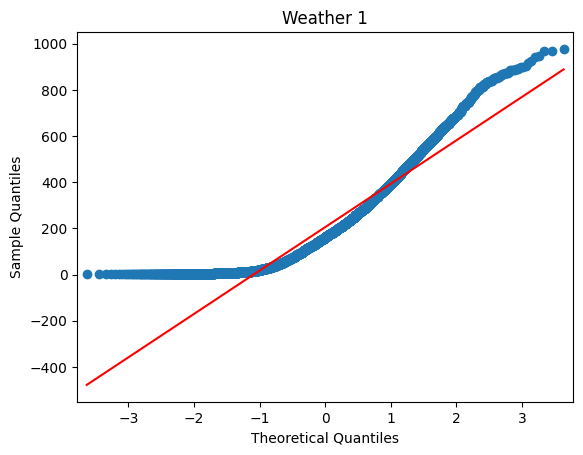

In [ ]:
qqplot(df_weather1, line="s")
plt.title("Weather 1")
plt.show()

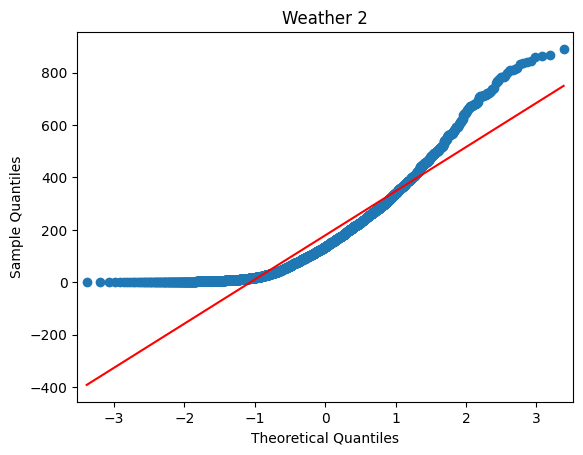

In [ ]:
qqplot(df_weather2, line="s")
plt.title("Weather 2")
plt.show()

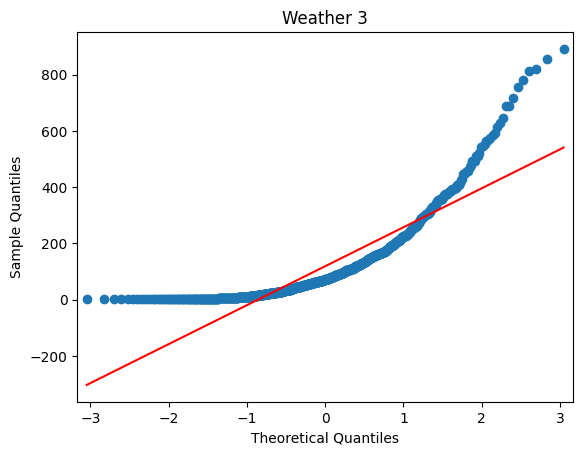

In [ ]:
qqplot(df_weather3, line="s")
plt.title("Weather 3")
plt.show()

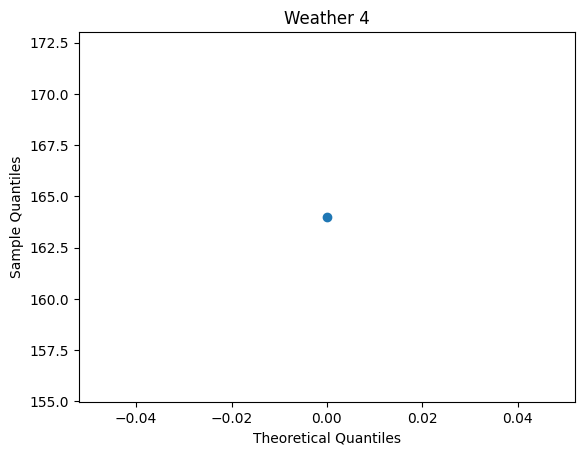

In [ ]:
qqplot(df_weather4, line="s")
plt.title("Weather 4")
plt.show()

#Insight:

# data does not follows normal distribution.

#In weather 4, only one data point we have so the graph looks like  this.

#using shapiro test for Normality:


#HO: The sample follows normal distribution
#HA: The sample does not follow normal distribution

#alpha = 0.05

In [ ]:
test_stat, p_value = shapiro(df_weather1.sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.386483890140631e-19
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_weather2.sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6260256362351685e-18
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_weather3.sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.601449838560866e-26
The sample does not follow normal distribution


#using Lavene's test for Variance

# H0: Variances are equal
# Ha: Variances are not equal

In [ ]:
df_weather1.var(),df_weather2.var(),df_weather3.var()

(35328.79846268022, 28347.248993301797, 19204.77589271419)

In [ ]:
levene_stat, p_value = levene(df_weather1.sample(500),df_weather2.sample(500),df_weather3.sample(500))
print(levene_stat)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
    print("Variances are equal")

25.480195920243077
1.313028885605854e-11
Variances are not equal


#Insight:

# Samples are not normally distributed.

# variance are not equal.

# So f_oneway test cannot be performed.

#Using Kruskal-Wallis H-test for independent samples.

In [ ]:
test_stat, p_value = kruskal(df_weather1, df_weather2, df_weather3,df_weather4)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 205.00216514479087
p value = 3.501611300708679e-44


In [ ]:
if p_value < 0.05:
    print('Reject Null Hypothesis : No. of cycles rented different in different weather.')
else:
    print('Failed to reject Null Hypothesis: No. of cycles rented similar in different weather')

Reject Null Hypothesis : No. of cycles rented different in different weather.


#Insight:

#From hypothesis testing,

#No. of cycles rented different in different weather.

#Hypothesis Testing - 4

#Weather is dependent on season (check between 2 predictor variable).

# Setup Null hypothesis:

#Null Hypothesis ( H0 ) - Season and Weather are independent of each other.


#Alternate Hypothesis ( HA ) - Season and Weather are dependent on each other.

In [ ]:
contingency_table = pd.crosstab(df['weather'], df['season'])

contingency_table

season,Spring,Summer,Fall,Winter
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
chi_stat, p_value, dof, exp_freq = chi2_contingency(contingency_table)
chi_stat, p_value, dof, exp_freq

(49.15865559689363,
 1.5499250736864862e-07,
 9,
 array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
        [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
        [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
        [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

In [ ]:
if p_value < 0.05:
    print('Reject Null Hypothesis : Season and Weather are dependent on each other.')
else:
    print('Failed to reject Null Hypothesis:Season and Weather are independent of each other.')

Reject Null Hypothesis : Season and Weather are dependent on each other.


#Insight:

#From hypothesis testing,

#Season and Weather are dependent on each other.

#Correlation Analysis

[]

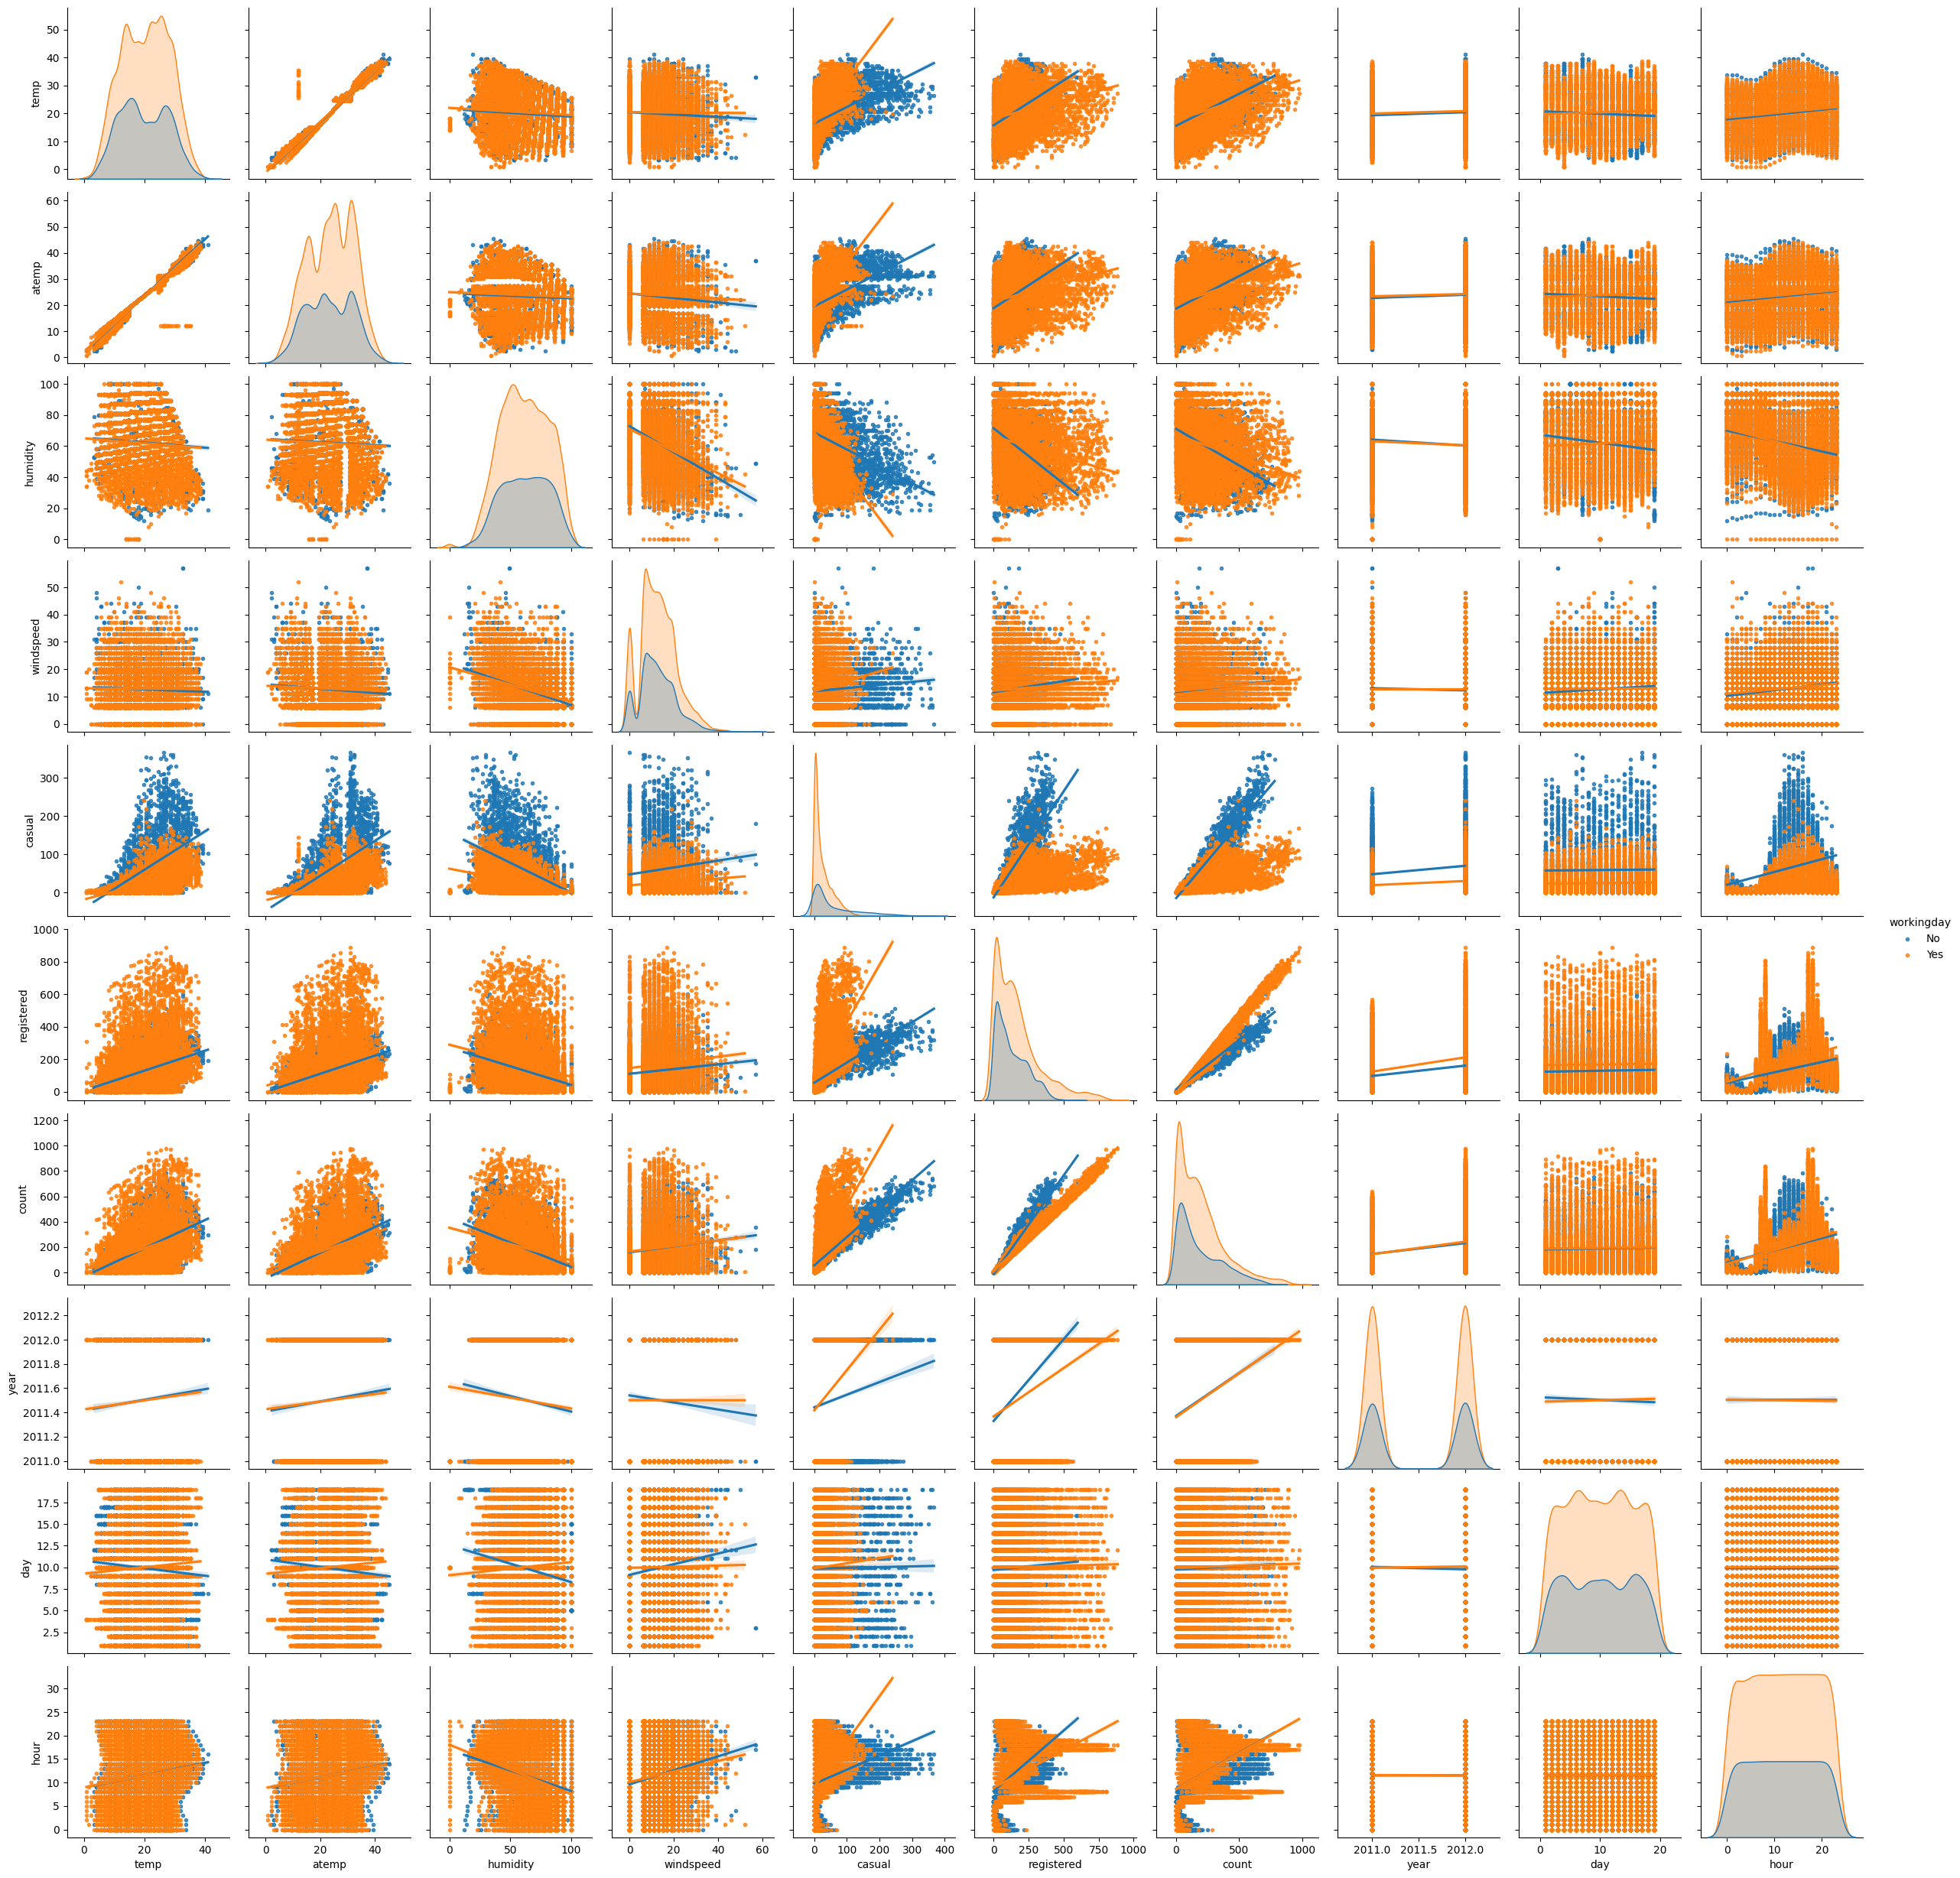

In [ ]:
sns.pairplot(data = df,
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

In [ ]:
cor_df = df.select_dtypes(include='number')
cor_df

,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
0,9.84,14.395,81,0.0000,3,13,16,2011,1,0
1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,9.02,13.635,80,0.0000,5,27,32,2011,1,2
3,9.84,14.395,75,0.0000,3,10,13,2011,1,3
4,9.84,14.395,75,0.0000,0,1,1,2011,1,4
...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329,336,2012,19,19
10882,14.76,17.425,57,15.0013,10,231,241,2012,19,20
10883,13.94,15.910,61,15.0013,4,164,168,2012,19,21
10884,13.94,17.425,61,6.0032,12,117,129,2012,19,22


In [ ]:
df_cor = cor_df.corr()
df_cor

,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.015551,0.145430
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.011866,0.140343
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,-0.011335,-0.278011
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,0.036157,0.146631
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.014109,0.302045
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.019111,0.380540
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403,0.019826,0.400601
year,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403,1.000000,0.001800,-0.004234
day,0.015551,0.011866,-0.011335,0.036157,0.014109,0.019111,0.019826,0.001800,1.000000,0.001132
hour,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601,-0.004234,0.001132,1.000000


[]

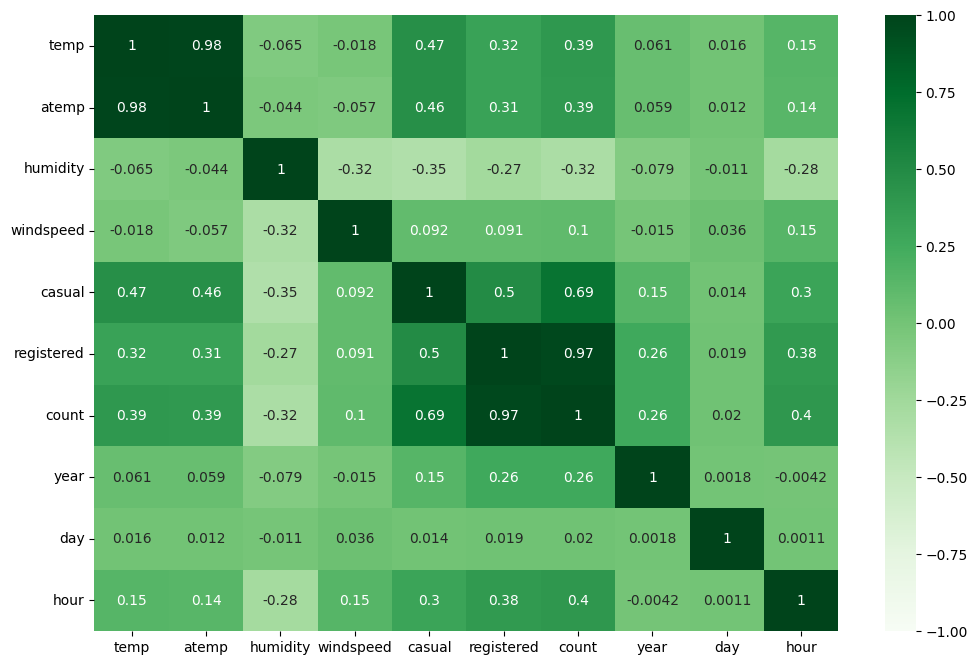

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df_cor, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot()

#Insight:

# very High correlation exists between temp, atemp, registered, count.
#Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
#Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]

#Recommendation:

#During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

#Providing some customer comfort in Yulu bike such as Umberlla, rain jackets, water bottles.

# Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

#Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

#Allocate resources for bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition.

#use social media platforms to promote electric bike for rental services.